In [3]:
import pandas as pd

# Load dataset
file_path = "C:\\Users\\Amr\\Downloads\\plant_health_data.csv"
df = pd.read_csv(file_path)

# Display basic information
print(df.info())

# Show first few rows
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               1200 non-null   object 
 1   Plant_ID                1200 non-null   int64  
 2   Soil_Moisture           1200 non-null   float64
 3   Ambient_Temperature     1200 non-null   float64
 4   Soil_Temperature        1200 non-null   float64
 5   Humidity                1200 non-null   float64
 6   Light_Intensity         1200 non-null   float64
 7   Soil_pH                 1200 non-null   float64
 8   Nitrogen_Level          1200 non-null   float64
 9   Phosphorus_Level        1200 non-null   float64
 10  Potassium_Level         1200 non-null   float64
 11  Chlorophyll_Content     1200 non-null   float64
 12  Electrochemical_Signal  1200 non-null   float64
 13  Plant_Health_Status     1200 non-null   object 
dtypes: float64(11), int64(1), object(2)
memo

In [4]:
# Drop Timestamp and Plant_ID
df.drop(columns=["Timestamp", "Plant_ID"], inplace=True)


In [13]:
# Check for missing values
print(df.isnull().sum())

# If missing values exist, fill or drop them
df.fillna(df.median(), inplace=True)  # Replace NaNs with column medians


Soil_Moisture             0
Ambient_Temperature       0
Soil_Temperature          0
Humidity                  0
Light_Intensity           0
Soil_pH                   0
Nitrogen_Level            0
Phosphorus_Level          0
Potassium_Level           0
Chlorophyll_Content       0
Electrochemical_Signal    0
Plant_Health_Status       0
dtype: int64


In [14]:
import numpy as np

# Function to remove outliers using IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply to numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df = remove_outliers(df, num_cols)


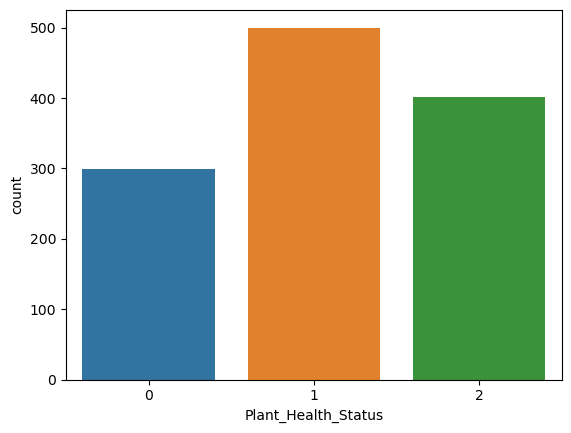

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check class distribution
sns.countplot(x=df["Plant_Health_Status"])
plt.show()


In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y_classification)


In [20]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical target
label_encoder = LabelEncoder()
df["Plant_Health_Status"] = label_encoder.fit_transform(df["Plant_Health_Status"])


In [21]:
# Define features and targets
X = df.drop(columns=["Plant_Health_Status", "Soil_Moisture"])
y_classification = df["Plant_Health_Status"]
y_regression = df["Soil_Moisture"]


In [22]:
from sklearn.model_selection import train_test_split

# Train-test split for classification
X_train, X_test, y_class_train, y_class_test = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# Train-test split for regression
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_regression, test_size=0.2, random_state=42)


In [23]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_class_train)

# Predict and evaluate
y_class_pred = clf.predict(X_test)
class_acc = accuracy_score(y_class_test, y_class_pred)
print(f"Classification Accuracy (RandomForest): {class_acc:.4f}")


Classification Accuracy (RandomForest): 0.4500


In [26]:
from xgboost import XGBClassifier

# Train XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_class_train)

# Predict and evaluate
y_xgb_class_pred = xgb_clf.predict(X_test)
xgb_class_acc = accuracy_score(y_class_test, y_xgb_class_pred)
print(f"Classification Accuracy (XGBoost): {xgb_class_acc:.4f}")


C:\Users\Amr\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:50:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Accuracy (XGBoost): 0.4083


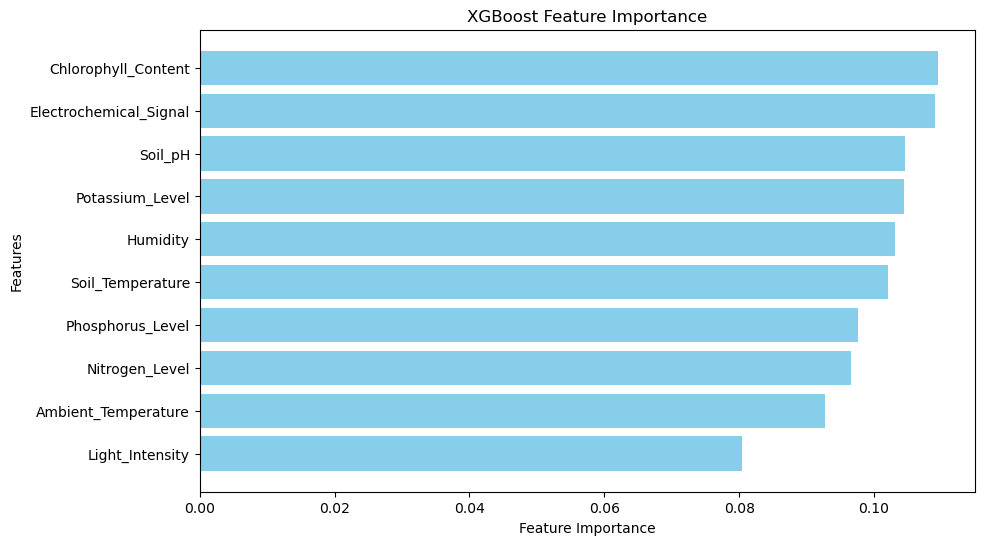

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from the best XGBoost model
feature_importance = best_xgb.feature_importances_

# Convert to DataFrame for better visualization
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()


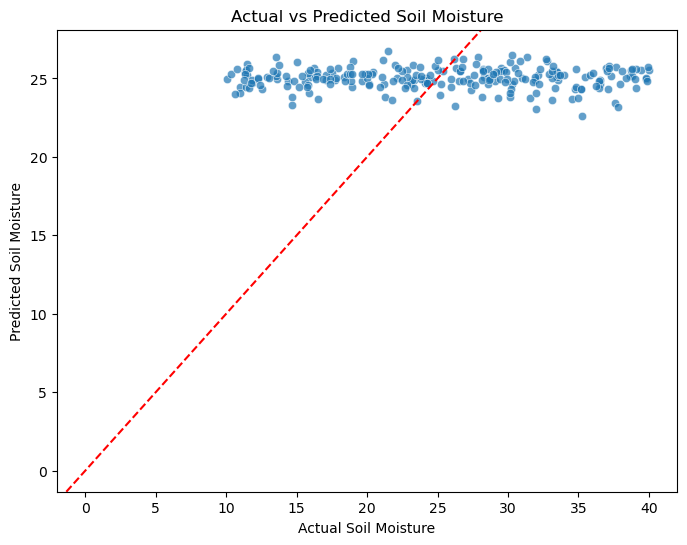

In [33]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_reg_test, y=y_xgb_imp_pred, alpha=0.7)
plt.xlabel("Actual Soil Moisture")
plt.ylabel("Predicted Soil Moisture")
plt.title("Actual vs Predicted Soil Moisture")
plt.axline([0, 0], [1, 1], color="red", linestyle="--")  # Ideal line
plt.show()


C:\Users\Amr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


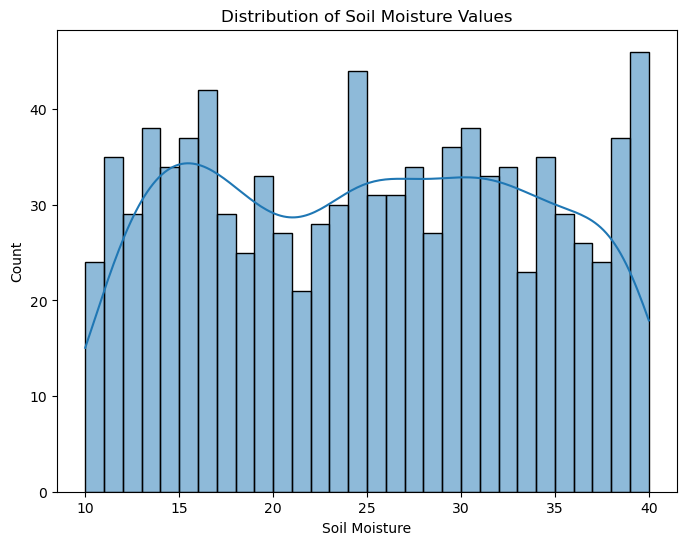

In [34]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(y_reg_train, bins=30, kde=True)
plt.xlabel("Soil Moisture")
plt.title("Distribution of Soil Moisture Values")
plt.show()


In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_imp)
X_test_scaled = scaler.transform(X_test_imp)


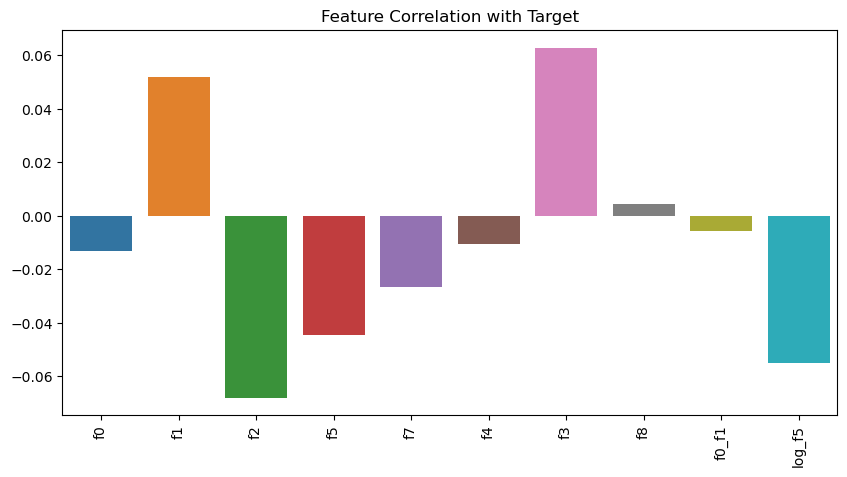

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation with target variable
corr = X_train_selected.corrwith(y_reg_train)
plt.figure(figsize=(10, 5))
sns.barplot(x=corr.index, y=corr.values)
plt.xticks(rotation=90)
plt.title("Feature Correlation with Target")
plt.show()


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Mean Squared Error (MSE): 16.2122
Root Mean Squared Error (RMSE): 4.0264
R² Score: 0.7726


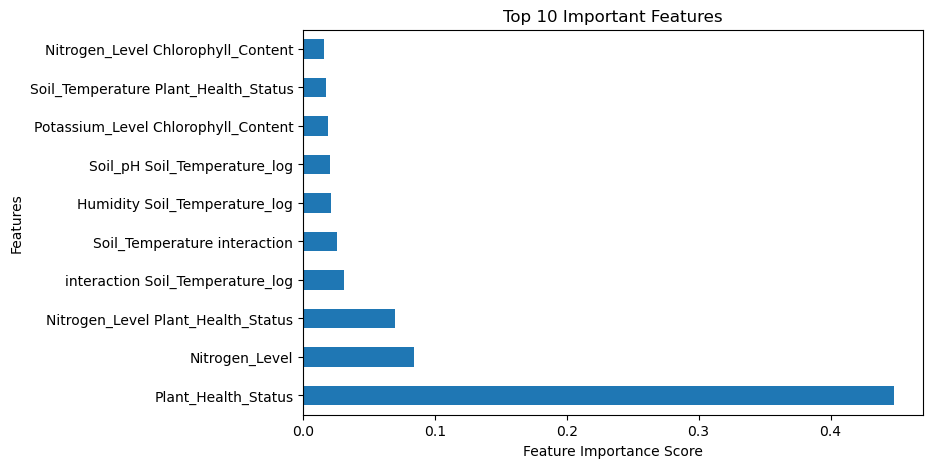

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load Data (Assuming `df` is already loaded)
X = df.drop(columns=["Soil_Moisture"])  # Target Variable
y = df["Soil_Moisture"]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute Feature Correlation & Select Features
correlation = X_train.corrwith(y_train).abs()
selected_features = correlation[correlation > 0.02].index.tolist()
X_train_selected = X_train[selected_features].copy()
X_test_selected = X_test[selected_features].copy()

# **Feature Engineering** - Using Soil_Temperature for interaction & log transform
feature_1 = "Soil_Temperature"
feature_2 = "Humidity"  # Adjust based on correlation or domain knowledge

X_train_selected["interaction"] = X_train_selected[feature_1] * X_train_selected[feature_2]
X_test_selected["interaction"] = X_test_selected[feature_1] * X_test_selected[feature_2]

X_train_selected[feature_1 + "_log"] = np.log1p(X_train_selected[feature_1])
X_test_selected[feature_1 + "_log"] = np.log1p(X_test_selected[feature_1])

# Save feature names before transformation
original_feature_names = X_train_selected.columns.tolist()

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Add Polynomial Features (degree=2)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# **Hyperparameter Tuning with GridSearchCV**
param_grid = {
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "n_estimators": [50, 100, 150]
}

xgb_model = XGBRegressor(random_state=42)
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring="r2", verbose=1)
grid_search.fit(X_train_poly, y_train)

# Best Model
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test_poly)

# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Get correct feature names after polynomial transformation
feature_names = poly.get_feature_names_out(input_features=original_feature_names)

# Convert feature importance to a readable format
xgb_importance = pd.Series(best_xgb.feature_importances_, index=feature_names)

# Plot the top 10 important features
plt.figure(figsize=(8, 5))
xgb_importance.nlargest(10).plot(kind="barh")
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()


In [92]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingRegressor

# Load Data
X = df.drop(columns=["Soil_Moisture"])  # Target Variable
y = df["Soil_Moisture"]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute Feature Correlation & Select Features
correlation = X_train.corrwith(y_train).abs()
selected_features = correlation[correlation > 0.02].index.tolist()
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# **Feature Engineering** - More Interactions & Log Transform
feature_1 = "Soil_Temperature"
feature_2 = "Humidity"  
feature_3 = "Plant_Health_Status"

X_train_selected["interaction_1"] = X_train_selected[feature_1] * X_train_selected[feature_2]
X_test_selected["interaction_1"] = X_test_selected[feature_1] * X_test_selected[feature_2]

X_train_selected["interaction_2"] = X_train_selected[feature_1] * X_train_selected[feature_3]
X_test_selected["interaction_2"] = X_test_selected[feature_1] * X_test_selected[feature_3]

X_train_selected[feature_1 + "_log"] = np.log1p(X_train_selected[feature_1])
X_test_selected[feature_1 + "_log"] = np.log1p(X_test_selected[feature_1])

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Add Polynomial Features (degree=2)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# **Hyperparameter Tuning using RandomizedSearchCV**
param_grid = {
    "learning_rate": [0.03, 0.05, 0.1],  # Smaller steps for better convergence
    "max_depth": [3, 5, 7],
    "n_estimators": [100, 200, 300],  # Increased trees for stability
    "reg_alpha": [0, 0.5, 1],
    "reg_lambda": [0, 0.5, 1],
    "subsample": [0.7, 0.8, 1.0],  # Avoid overfitting
    "colsample_bytree": [0.7, 0.85, 1.0],
    "colsample_bylevel": [0.7, 1.0]  # Adding new control over sampling
}

grid_search = RandomizedSearchCV(
    XGBRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring="r2",
    n_iter=30,  # Increased iterations for better search
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all cores for faster training
)
grid_search.fit(X_train_poly, y_train)

# Best Model from Randomized Search
best_xgb = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# **Ensemble Learning (Stacking)**
base_models = [
    ('xgb', best_xgb),
    ('rf', RandomForestRegressor(n_estimators=200, max_depth=5, random_state=42))
]
stacking_model = StackingRegressor(estimators=base_models, final_estimator=Ridge(alpha=1.0))
stacking_model.fit(X_train_poly, y_train)

# Predictions
y_pred = stacking_model.predict(X_test_poly)

# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


C:\Users\Amr\AppData\Local\Temp\ipykernel_12352\946667573.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_selected["interaction_1"] = X_train_selected[feature_1] * X_train_selected[feature_2]
C:\Users\Amr\AppData\Local\Temp\ipykernel_12352\946667573.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_selected["interaction_1"] = X_test_selected[feature_1] * X_test_selected[feature_2]
C:\Users\Amr\AppData\Local\Temp\ipykernel_12352\946667573.py:33: SettingWithCopyWarning: 
A value is tryi

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.03, 'colsample_bytree': 0.85, 'colsample_bylevel': 1.0}
Mean Squared Error (MSE): 15.8781
Root Mean Squared Error (RMSE): 3.9847
R² Score: 0.7772
